<a href="https://colab.research.google.com/github/gianpDomiziani/TinyML/blob/main/Horse_or_Human_WithAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-01-17 11:57:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   111MB/s    in 1.3s    

2021-01-17 11:57:51 (111 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-01-17 11:57:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [19]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])
print(len(train_horse_dir))

['horse41-3.png', 'horse26-1.png', 'horse32-0.png', 'horse49-3.png', 'horse03-0.png', 'horse35-4.png', 'horse05-2.png', 'horse36-3.png', 'horse17-6.png', 'horse40-4.png']
['human04-15.png', 'human05-20.png', 'human13-14.png', 'human05-21.png', 'human12-29.png', 'human08-08.png', 'human07-08.png', 'human15-15.png', 'human12-03.png', 'human03-02.png']
['horse5-488.png', 'horse1-122.png', 'horse3-416.png', 'horse2-136.png', 'horse4-548.png', 'horse3-326.png', 'horse4-541.png', 'horse4-159.png', 'horse3-484.png', 'horse2-183.png']
['valhuman04-24.png', 'valhuman03-04.png', 'valhuman05-24.png', 'valhuman04-07.png', 'valhuman04-12.png', 'valhuman01-11.png', 'valhuman04-15.png', 'valhuman01-14.png', 'valhuman02-13.png', 'valhuman04-18.png']
26


In [4]:
import tensorflow as tf

In [24]:
model = tf.keras.models.Sequential([
                                    # first conv2d
                                    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    # second conv2d
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(),
                                    # thirt conv2d
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(),
                                    # fourth conv2d
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
      
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 33, 33, 64)       

In [25]:
from tensorflow.keras.optimizers import RMSprop, Adam

#model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=['acc'])

model.compile(optimizer=Adam(lr=0.0001), loss="binary_crossentropy", metrics=['acc'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(300, 300),
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [27]:
NUM_EPOCHS=25

In [28]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=NUM_EPOCHS,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/25
8/8 [==============================] - 22s 3s/step - loss: 0.7096 - acc: 0.5043 - val_loss: 0.6709 - val_acc: 0.5000
Epoch 2/25
8/8 [==============================] - 24s 3s/step - loss: 0.6811 - acc: 0.5463 - val_loss: 0.6546 - val_acc: 0.5547
Epoch 3/25
8/8 [==============================] - 22s 3s/step - loss: 0.6462 - acc: 0.6898 - val_loss: 0.7903 - val_acc: 0.5039
Epoch 4/25
8/8 [==============================] - 21s 3s/step - loss: 0.6228 - acc: 0.6386 - val_loss: 0.5743 - val_acc: 0.6445
Epoch 5/25
8/8 [==============================] - 21s 3s/step - loss: 0.5780 - acc: 0.7269 - val_loss: 0.5458 - val_acc: 0.6562
Epoch 6/25
8/8 [==============================] - 21s 3s/step - loss: 0.5455 - acc: 0.7349 - val_loss: 0.7880 - val_acc: 0.5859
Epoch 7/25
8/8 [==============================] - 21s 3s/step - loss: 0.5031 - acc: 0.7597 - val_loss: 0.9676 - val_acc: 0.5742
Epoch 8/25
8/8 [==============================] - 23s 3s/step - loss: 0.4584 - acc: 0.7976 - val_loss: 1

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse1-127.png to horse1-127.png
[[1.]]
[1.]
horse1-127.png is a human


In [ ]:
model.layers[:][0].name

'conv2d_4'

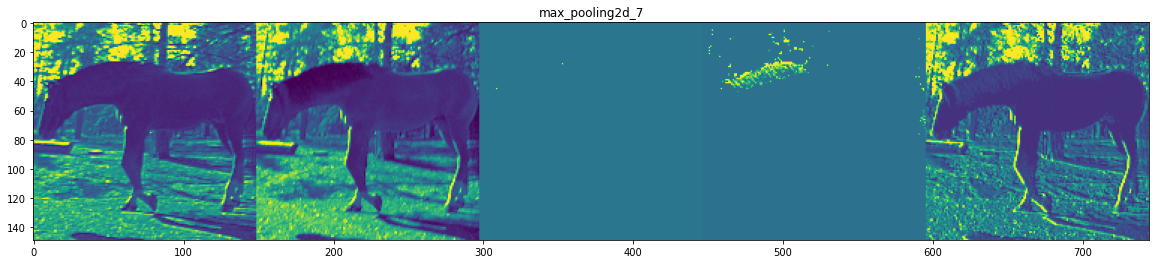

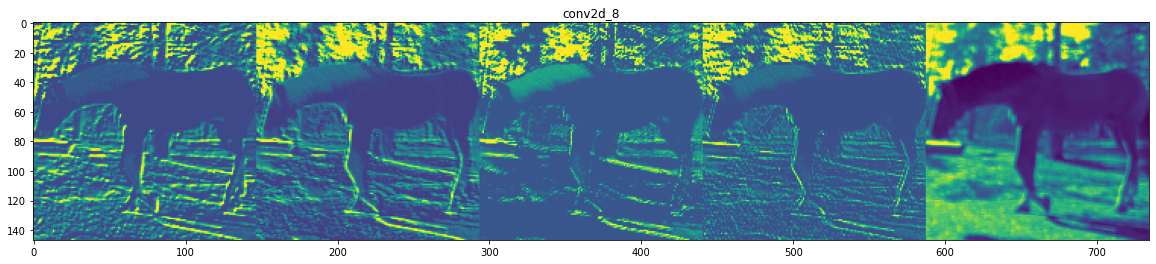

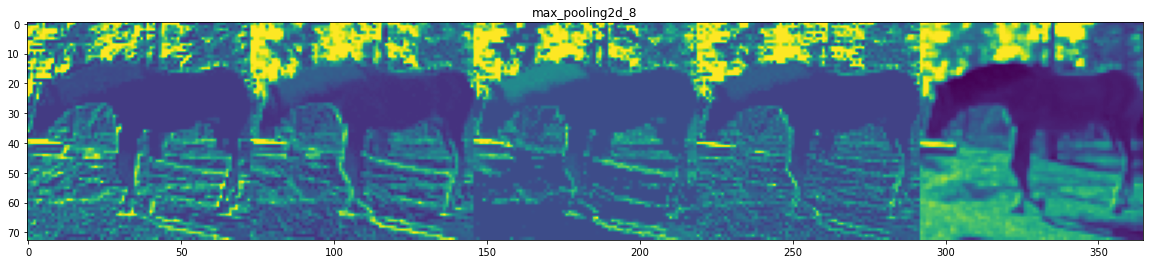

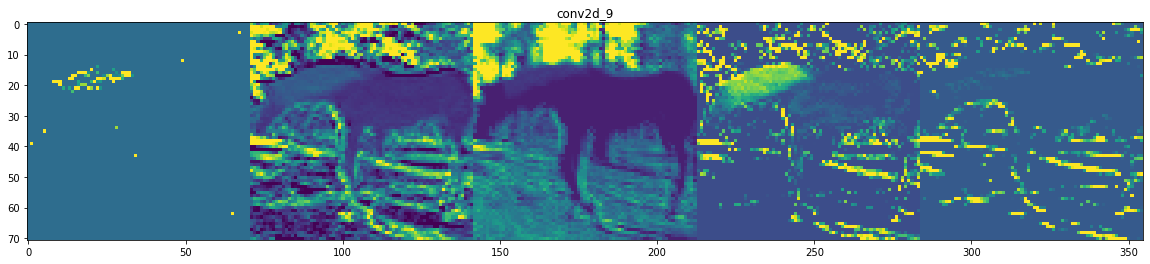

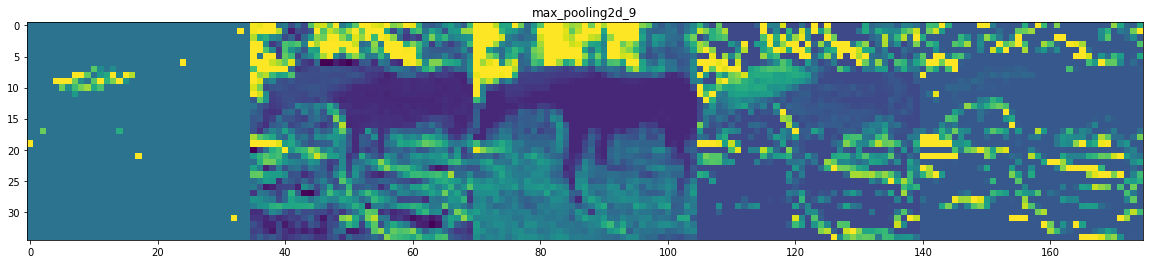

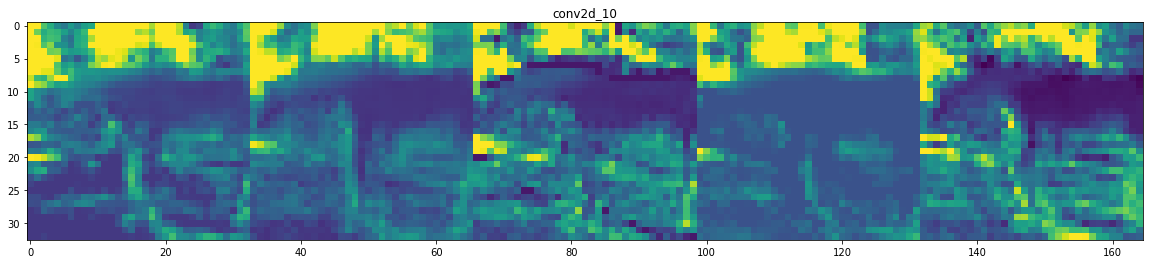

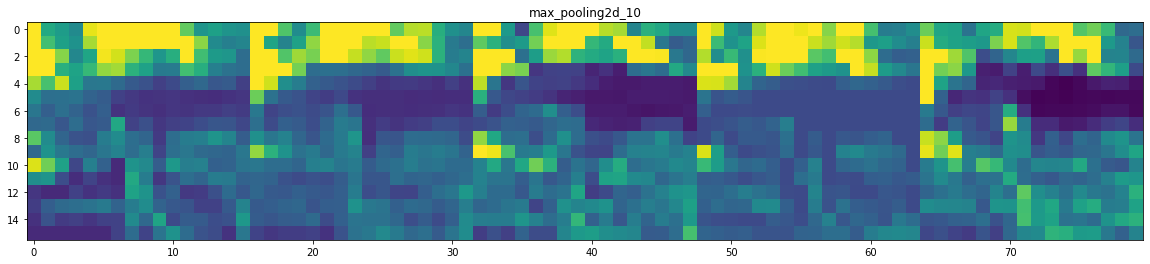

In [30]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = 5
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')